In [1]:
#Imports

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
#Reading the whale_returns data.
whale_returns_data = pd.read_csv("whale_returns.csv")

In [3]:
#Turning the data into a dataframe object.
whale_returns_df = pd.DataFrame(data=whale_returns_data)

In [4]:
whale_returns_df.shape

(1060, 5)

In [5]:
#Taking a quick look at the dataframe.
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
#Checking existance of NA values.
whale_returns_df.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
#Dropping NA values. inplace*
whale_returns_df.dropna(inplace=True)

In [8]:
#Checking NA values were dropped.
whale_returns_df.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
#Setting the 'Date' column as the index, inplace*
whale_returns_df.set_index('Date',inplace=True)

In [10]:
#Turning the date index into a datetime object.
whale_returns_df.index = pd.to_datetime(whale_returns_df.index)

In [11]:
#Viewing the head of the dataframe.
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [12]:
#Reading Algo_Returns CSV file
algo_returns_data = pd.read_csv("algo_returns.csv")

In [13]:
#Turning Algo_Returns data into a pandas DataFrame
algo_returns_df = pd.DataFrame(data=algo_returns_data)

In [14]:
algo_returns_df.shape

(1241, 3)

In [15]:
#Taking a quick look at the data.
algo_returns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [16]:
#Counting null values
algo_returns_df.isna().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [17]:
#Dropping null values
algo_returns_df.dropna(inplace=True)

In [18]:
#Checking null values, second time.
algo_returns_df.isna().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [19]:
#Setting the 'Date' column as the index. inplace*
algo_returns_df.set_index('Date',inplace=True)

In [20]:
#Converting the 'Date' index into datetime format
algo_returns_df.index = pd.to_datetime(algo_returns_df.index)

In [21]:
#Taking a quick look at the dataframe.
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [22]:
#Reading the CSV file.
sp500_data = pd.read_csv("sp500_history.csv")

In [23]:
#Converting CSV file into Pandas DataFrame
sp500_df = pd.DataFrame(data=sp500_data)

In [24]:
#Quick look at shape/size.
sp500_df.shape

(1649, 2)

In [25]:
#Out of order. Shows Earliest dates first
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [26]:
#Reverse the order of dates and closing prices (Oldest First)
sp500_df = sp500_df[::-1].reset_index()

In [27]:
#Drop old index column
del sp500_df['index']

In [28]:
#Looks better
sp500_df.head()

,Date,Close
0,1-Oct-12,$1444.49
1,2-Oct-12,$1445.75
2,3-Oct-12,$1450.99
3,4-Oct-12,$1461.40
4,5-Oct-12,$1460.93


In [29]:
#Viewing data types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [30]:
#Getting rid of the dollar sign.
sp500_df["Close"] = sp500_df["Close"].str.replace('$','')

In [31]:
#Changing Close dtypes to float64.
sp500_df["Close"] = sp500_df["Close"].astype(float)

In [32]:
sp500_df.dtypes

Date      object
Close    float64
dtype: object

In [33]:
#Calculating Daily Returns, came back neg, so had to mult by -1
sp500_df["Close"] = (sp500_df["Close"].shift(1) / sp500_df["Close"] - 1)*-1

In [34]:
#Drop NA value
sp500_df.dropna(inplace=True)

In [35]:
#Setting the Date as the index.
sp500_df.set_index('Date',inplace=True)

In [36]:
#Converting the 'Date' index into datetime format
sp500_df.index = pd.to_datetime(sp500_df.index)

In [37]:
#Renaming Close to "S&P 500", inplace=True*
sp500_df.rename(columns={"Close":"S&P 500"},inplace=True)

In [38]:
#Seems all right.
sp500_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003611
2012-10-04,0.007123
2012-10-05,-0.000322
2012-10-08,-0.003469


In [39]:
#Concatenating dataframes on columns
#Shape of axis=1 is (1664,7)
#Shape of axis=0 is (3942,7), that doesn't seem right... 
#Will set to axis=1 for better overlap.
portfolio_returns = pd.concat([sp500_df,algo_returns_df,whale_returns_df],axis=1)
portfolio_returns.shape

(1664, 7)

In [40]:
#Well... That's a sizeable amount of NA values.
#Let's see if we can get a better look at what's going on.
portfolio_returns.isna().sum()

S&P 500                         16
Algo 1                         429
Algo 2                         429
SOROS FUND MANAGEMENT LLC      605
PAULSON & CO.INC.              605
TIGER GLOBAL MANAGEMENT LLC    605
BERKSHIRE HATHAWAY INC         605
dtype: int64

In [41]:
#S&P 500 DF starts first, farther into the past..
portfolio_returns.head()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2012-10-02,0.000872,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-03,0.003611,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,0.007123,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,-0.000322,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-08,-0.003469,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Funny, S&P500 isn't as well-updated.
portfolio_returns.tail(10)

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-17,-0.002279,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001577,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-22,0.001011,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-23,0.008764,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278
2019-04-24,NaN,0.001095,0.000399,0.002284,0.001009,-0.004000,-0.006386
2019-04-25,NaN,0.000682,-0.007247,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,NaN,0.002981,0.005256,0.008149,0.009162,0.012355,0.010434
2019-04-29,NaN,0.005208,0.002829,0.001254,0.002719,0.006251,0.005223
2019-04-30,NaN,-0.002944,-0.001570,-0.001295,-0.002211,-0.000259,-0.003702


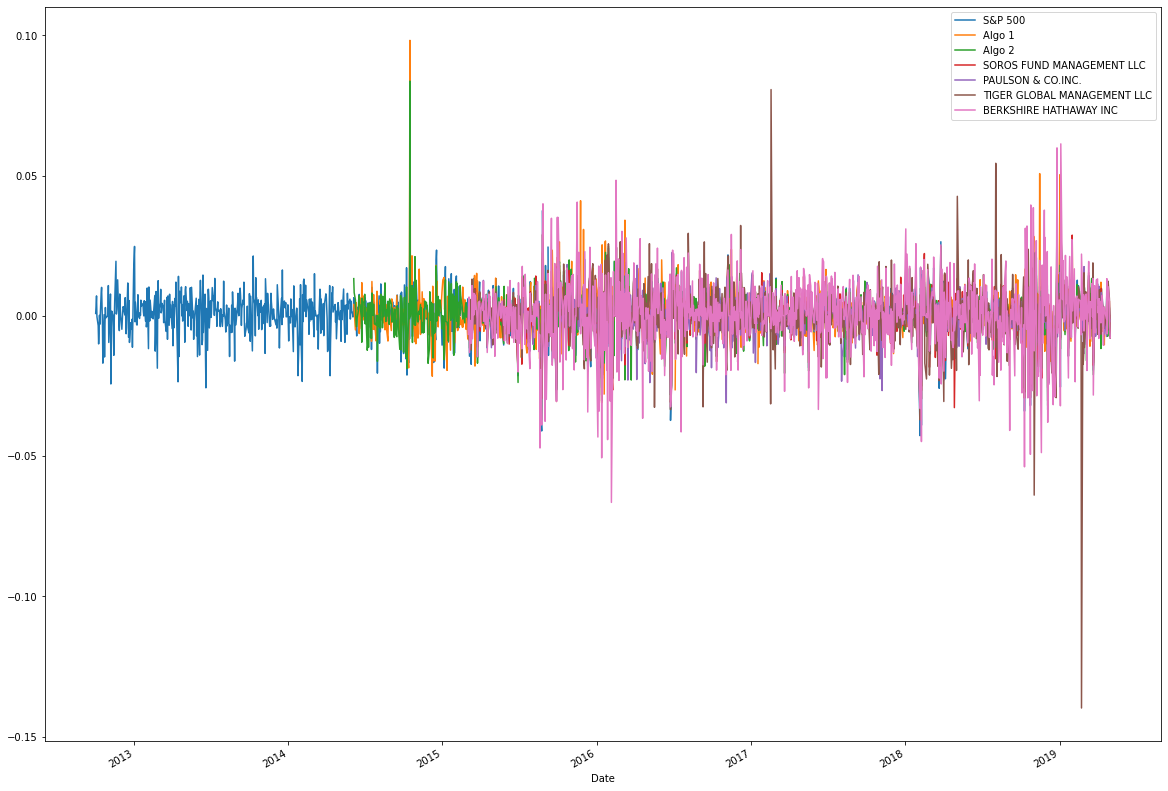

In [43]:
#Can tell from dataframe and graph that the S&P 500 dataframe
#goes farther into the past, which would cause a lot of NA values upon concatn.
#1 or 2 years would be about 400-600 NA values~. makes sense.
portfolio_returns.plot(kind='line',figsize=(20,15))

In [44]:
#Whale Returns doesn't start until 2015-03-03
#That's where the linegraph on GitLab seems to start too.
#Let's drop the NA values.
portfolio_returns.dropna(inplace=True)

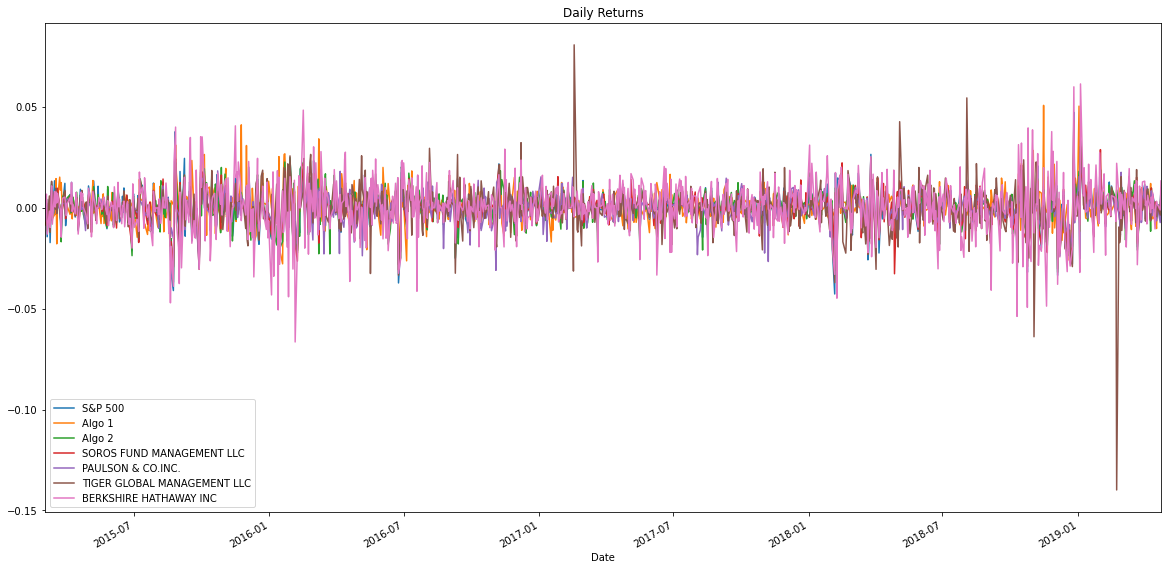

In [45]:
#New linegraph
#Changed XLim to fit better.
#Added title
#Made figsize wider to dampen noise.
portfolio_returns.plot(kind='line',figsize=(20,10), xlim=('2015-03-03','2019-04-23'),
           title='Daily Returns')

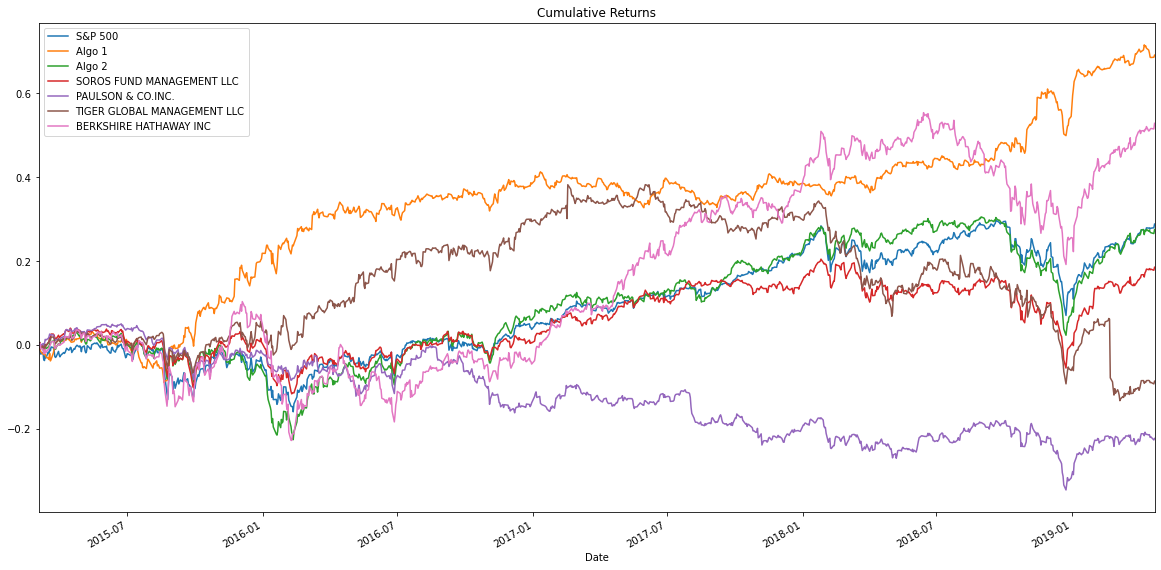

In [46]:
#Plotting cumulative sum returns graph, running cumsum() before plot() function
portfolio_returns.cumsum().plot(kind='line',figsize=(20,10), xlim=('2015-03-03','2019-04-23'),
           title='Cumulative Returns')

In [47]:
#Risk Analysis
#Quick glance at stat variables.
portfolio_returns.describe()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.000276,0.000662,0.000263,0.000177,-0.000214,-0.000083,0.000506
std,0.008584,0.007620,0.008342,0.007895,0.007023,0.010894,0.012919
min,-0.042730,-0.030951,-0.036937,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.002889,-0.003252,-0.003794,-0.003638,-0.004042,-0.004790,-0.005634
50%,0.000419,0.000069,0.000703,0.000518,0.000000,0.000320,0.000735
75%,0.004451,0.003908,0.005253,0.004328,0.003626,0.005285,0.007619
max,0.047250,0.050735,0.030822,0.042977,0.029338,0.080705,0.061341


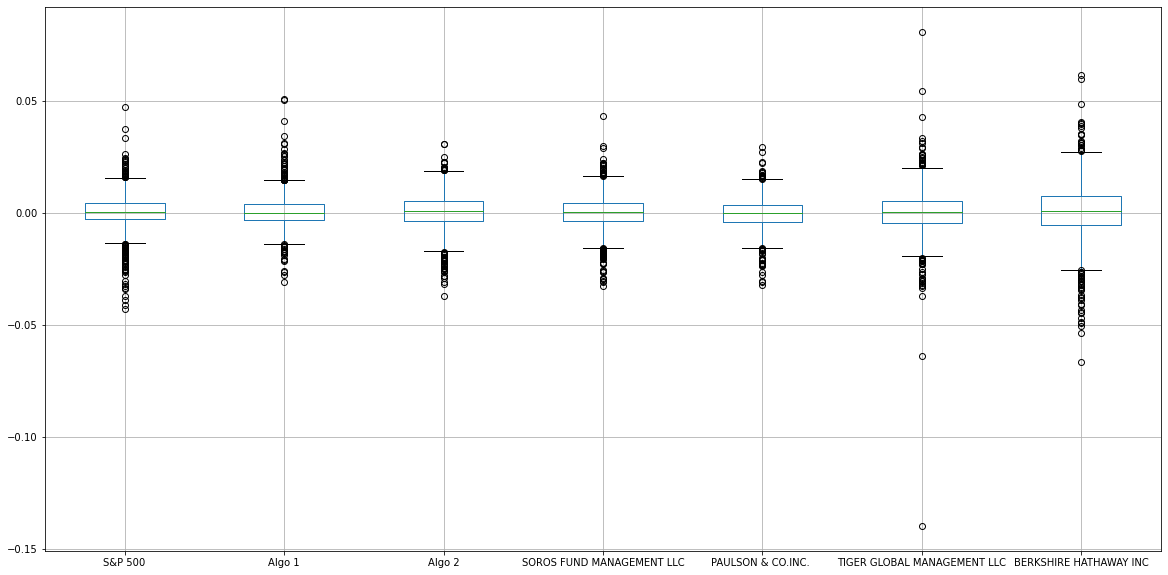

In [48]:
#Boxplot of each portfolio
portfolio_returns.boxplot(figsize=(20,10))

In [49]:
#Run function to check the standard deviation of the daily returns of the portfolios.
#----------------------------------------------------
#The higher std of Berkshire Hathaway and Tiger Global,
#relative to the S&P 500 std, indicate to me that they have
#more volatility, which would indicate more risk.
#----------------------------------------------------
portfolio_returns.std()

S&P 500                        0.008584
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [50]:
#Comparing the std of portfolios against S&P 500
portfolio_returns.std() > portfolio_returns.std()['S&P 500']

S&P 500                        False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [51]:
#Sample/Random annualized standard deviation of 252 Trading Days.
#Perhaps running the std on the tailend of the dataframe would be better?
#portfolio_returns.tail(252).std()  ???
portfolio_returns.sample(252).std()

S&P 500                        0.008248
Algo 1                         0.008282
Algo 2                         0.007981
SOROS FUND MANAGEMENT LLC      0.007444
PAULSON & CO.INC.              0.006556
TIGER GLOBAL MANAGEMENT LLC    0.012892
BERKSHIRE HATHAWAY INC         0.012217
dtype: float64

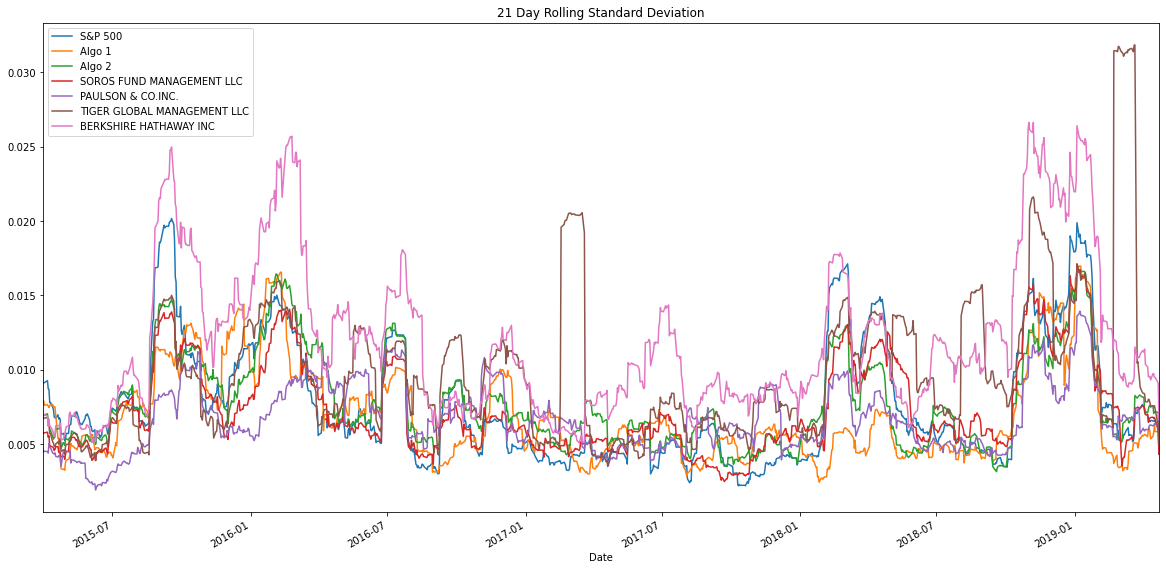

In [52]:
#Calculated and plotted the rolling std for portfolios using a 21 day window.
portfolio_returns.rolling(21).std().plot(kind='line', figsize=(20,10), title='21 Day Rolling Standard Deviation', xlim=('2015-03-31',
                                                                                                             '2019-04-23'))

In [53]:
#Correlation Dataframe/Table
portfolio_returns.corr()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P 500,1.000000,0.277452,0.859270,0.837734,0.669375,0.624347,0.751088
Algo 1,0.277452,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.859270,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837734,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669375,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.624347,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.751088,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000


In [54]:
#Setting covariance portfolio objects.
Algo1_covariance = portfolio_returns['Algo 1'].cov(portfolio_returns['S&P 500'])
Algo2_covariance = portfolio_returns['Algo 2'].cov(portfolio_returns['S&P 500'])
soros_covariance = portfolio_returns['SOROS FUND MANAGEMENT LLC'].cov(portfolio_returns['S&P 500'])
Paulson_covariance = portfolio_returns["PAULSON & CO.INC. "].cov(portfolio_returns['S&P 500'])
Tiger_covariance = portfolio_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(portfolio_returns['S&P 500'])
Berkshire_covariance = portfolio_returns['BERKSHIRE HATHAWAY INC'].cov(portfolio_returns['S&P 500'])

In [55]:
#Setting the market as the benchmark~variance.
variance = portfolio_returns['S&P 500'].var()

In [56]:
# Calculate beta of all daily returns of portfolios
Algo1_beta = Algo1_covariance / variance
Algo2_beta = Algo2_covariance / variance
soros_beta = soros_covariance / variance
Paulson_beta = Paulson_covariance / variance
Tiger_beta = Tiger_covariance / variance
Berkshire_beta = Berkshire_covariance / variance

In [57]:
#Rolling CoVariance variables, 21 day window.
rolling_Algo1_covariance = portfolio_returns['Algo 1'].rolling(window=21).cov(portfolio_returns['S&P 500'])
rolling_Algo2_covariance = portfolio_returns['Algo 2'].rolling(window=21).cov(portfolio_returns['S&P 500'])
rolling_soros_covariance = portfolio_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(portfolio_returns['S&P 500'])
rolling_Paulson_covariance = portfolio_returns['PAULSON & CO.INC. '].rolling(window=21).cov(portfolio_returns['S&P 500'])
rolling_Tiger_covariance = portfolio_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).cov(portfolio_returns['S&P 500'])
rolling_Berkshire_covariance = portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(portfolio_returns['S&P 500'])

#Rolling variance, 21 day window.
rolling_variance = portfolio_returns['S&P 500'].rolling(window=21).var()

In [58]:
#Rolling Beta Objects
rolling_Algo1_beta = rolling_Algo1_covariance / rolling_variance
rolling_Algo2_beta = rolling_Algo2_covariance / rolling_variance
rolling_soros_beta = rolling_soros_covariance / rolling_variance
rolling_Paulson_beta = rolling_Paulson_covariance / rolling_variance
rolling_Tiger_beta = rolling_Tiger_covariance / rolling_variance
rolling_Berkshire_beta = rolling_Berkshire_covariance / rolling_variance

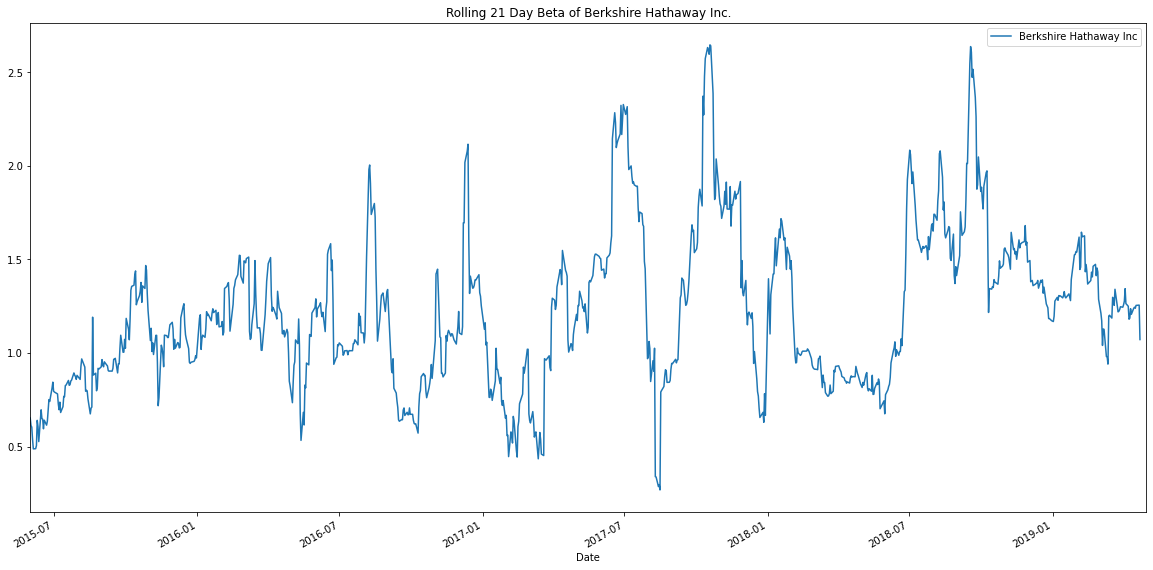

In [59]:
#Creating a plot of rolling betas.
#ax = rolling_Algo1_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Portfolios')
#rolling_Algo2_beta.plot(ax=ax)
#rolling_soros_beta.plot(ax=ax)
#rolling_Paulson_beta.plot(ax=ax)
#rolling_Tiger_beta.plot(ax=ax)
rolling_Berkshire_beta.plot(figsize=(20, 10),
                            title='Rolling 21 Day Beta of Berkshire Hathaway Inc.',
                           xlim=('2015-06-01','2019-05-01')).legend(['Berkshire Hathaway Inc'])

# Set the legend of the figure
#ax.legend(["Algo1", "Algo2", 'SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ',
#           'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC'])

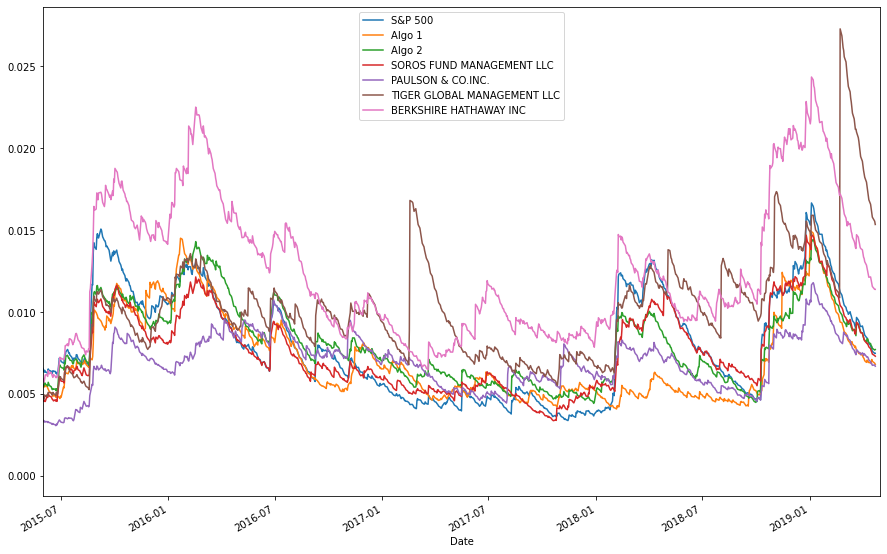

In [60]:
#EWM Graph, HalfLife 21, Std.
portfolio_returns.ewm(halflife=21).std().plot(figsize=(15,10),xlim=('2015-06-01','2019-05-01'))

In [61]:
#Calculating Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

S&P 500                        0.510171
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

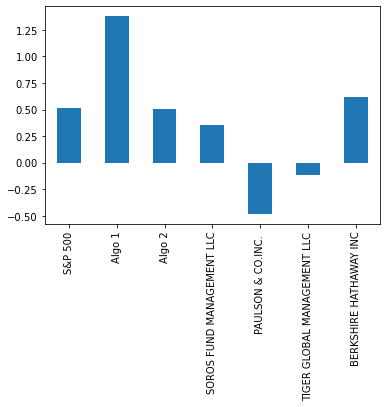

In [62]:
#The algo portfolios are currently outperforming the whales and market.
sharpe_ratios.plot(kind='bar')

In [63]:
#Find Path to test_portfolio
test_portfolio_p = Path("../test_portfolio.csv")

In [64]:
#read test portfolio as csv, set date as index, parse dates.
test_portfolio_c = pd.read_csv(test_portfolio_p)

In [65]:
#read test portfolio as dataframe
test_portfolio_df = pd.DataFrame(data=test_portfolio_c)
#Turn 'Date' values into Datetime object
test_portfolio_df['Date'] = pd.to_datetime(test_portfolio_df['Date'])
#Get rid of hours/minutes/seconds
test_portfolio_df['Date'] = test_portfolio_df['Date'].apply(lambda t: t.strftime('%Y-%m-%d'))
#set Date as index
test_portfolio_df.set_index(test_portfolio_df['Date'],inplace=True)
#Drop multiple date columns
test_portfolio_df.drop(columns=['Date','Date.1','Date.2','Date.3','Date.4'],inplace=True)
#Rename Columns
test_portfolio_df.rename(columns={"Close":"GOOG","Close.1":"MSFT",
                                 "Close.2":"PG","Close.3":"TSLA",
                                 "Close.4":"ATVI"},inplace=True)
#Quick look at dataframe
test_portfolio_df.head()

,GOOG,MSFT,PG,TSLA,ATVI
Date,,,,,
2015-03-03,572.07,43.28,85.16,199.56,23.10
2015-03-04,571.80,43.06,84.35,202.44,22.93
2015-03-05,573.76,43.11,84.63,200.63,23.29
2015-03-06,566.13,42.36,82.66,193.88,23.07
2015-03-09,567.29,42.85,83.09,190.88,23.32


In [66]:
#Create a returns dataframe and dropNA values.
test_returns = test_portfolio_df.pct_change()
test_returns.index = pd.to_datetime(test_returns.index)
test_returns.dropna(inplace=True)
test_returns

,GOOG,MSFT,PG,TSLA,ATVI
Date,,,,,
2015-03-04,-0.000472,-0.005083,-0.009512,0.014432,-0.007359
2015-03-05,0.003428,0.001161,0.003320,-0.008941,0.015700
2015-03-06,-0.013298,-0.017397,-0.023278,-0.033644,-0.009446
2015-03-09,0.002049,0.011568,0.005202,-0.015473,0.010837
2015-03-10,-0.024326,-0.019137,-0.018654,-0.002934,-0.024871
...,...,...,...,...,...
2019-04-15,0.002652,0.000827,0.006377,-0.004931,-0.032360
2019-04-16,0.004938,-0.002313,0.006526,0.026203,-0.015082
2019-04-17,0.007505,0.008280,-0.005356,-0.007792,-0.001775


In [67]:
#Create even weights
weights = [0.2,0.2,0.2,0.2,0.2]
#Create returns using dot function and passing weights
port_weighted_returns = test_returns.dot(weights)
#From Series into DataFrame
port_weighted_returns = pd.DataFrame(data=port_weighted_returns)
#Turning the index into datetime values.
port_weighted_returns.index = pd.to_datetime(port_weighted_returns.index)
#Naming Column
port_weighted_returns.rename(columns={0:'Custom'},inplace=True)
##
port_weighted_returns

,Custom
Date,
2015-03-04,-0.001599
2015-03-05,0.002933
2015-03-06,-0.019413
2015-03-09,0.002836
2015-03-10,-0.017984
...,...
2019-04-15,-0.005487
2019-04-16,0.004054
2019-04-17,0.000172


In [68]:
#Concatenating, seems to have broken the datetime index...
all_returns = pd.concat([portfolio_returns, port_weighted_returns],axis=1)
all_returns['Date'] = all_returns.index
#Turn 'Date' values into Datetime object
all_returns['Date'] = pd.to_datetime(all_returns['Date'])
#Can't tell whether I needed this, or the date column was being finicky.
#Pretty sure I don't, but it doesn't throw errors or mess up the code.
all_returns.index = pd.to_datetime(all_returns.index)
#Get rid of hours/minutes/seconds
all_returns['Date'] = all_returns['Date'].apply(lambda t: t.strftime('%Y-%m-%d'))
#set Date as index
all_returns.set_index(all_returns['Date'],inplace=True)
#Drop seperate Date column
all_returns.drop(columns=['Date'],inplace=True)
#Drop NA values
all_returns.dropna(inplace=True)

In [69]:
all_returns.head()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Custom
Date,,,,,,,,
2015-03-04,-0.004408,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001599
2015-03-05,0.001195,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.002933
2015-03-06,-0.014378,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.019413
2015-03-09,0.003929,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.002836
2015-03-10,-0.017254,-0.001392,-0.012155,-0.010263,-0.005341,-0.012079,-0.009739,-0.017984


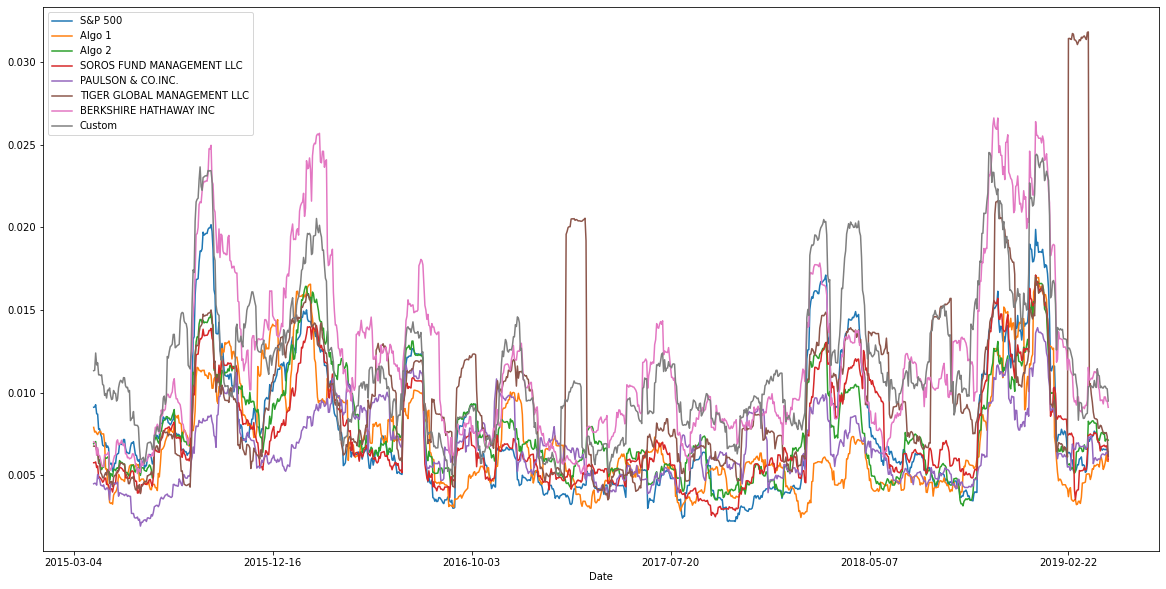

In [70]:
all_returns.rolling(21).std().plot(kind='line',legend=True,figsize=(20,10))

In [71]:
#Annualized Sharpe Ratios
sharpe_ratios_all = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios_all

S&P 500                        0.503511
Algo 1                         1.374206
Algo 2                         0.486307
SOROS FUND MANAGEMENT LLC      0.345506
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
BERKSHIRE HATHAWAY INC         0.614872
Custom                         0.964391
dtype: float64

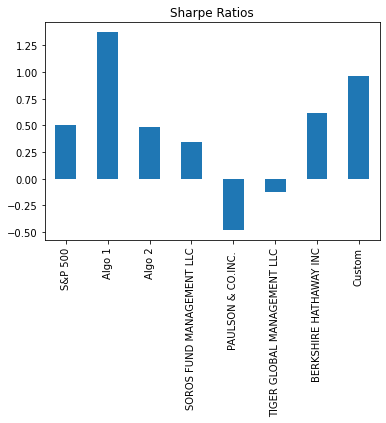

In [74]:
sharpe_ratios_all.plot(kind='bar',title='Sharpe Ratios')

In [78]:
all_returns.corr()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Custom
S&P 500,1.000000,0.276961,0.859188,0.837644,0.669161,0.624253,0.750781,0.765597
Algo 1,0.276961,1.000000,0.287823,0.320864,0.268483,0.164111,0.291557,0.223323
Algo 2,0.859188,0.287823,1.000000,0.826726,0.678147,0.507161,0.687785,0.616984
SOROS FUND MANAGEMENT LLC,0.837644,0.320864,0.826726,1.000000,0.699870,0.561043,0.754182,0.655684
PAULSON & CO.INC.,0.669161,0.268483,0.678147,0.699870,1.000000,0.434380,0.545294,0.478888
TIGER GLOBAL MANAGEMENT LLC,0.624253,0.164111,0.507161,0.561043,0.434380,1.000000,0.424166,0.492173
BERKSHIRE HATHAWAY INC,0.750781,0.291557,0.687785,0.754182,0.545294,0.424166,1.000000,0.697969
Custom,0.765597,0.223323,0.616984,0.655684,0.478888,0.492173,0.697969,1.000000


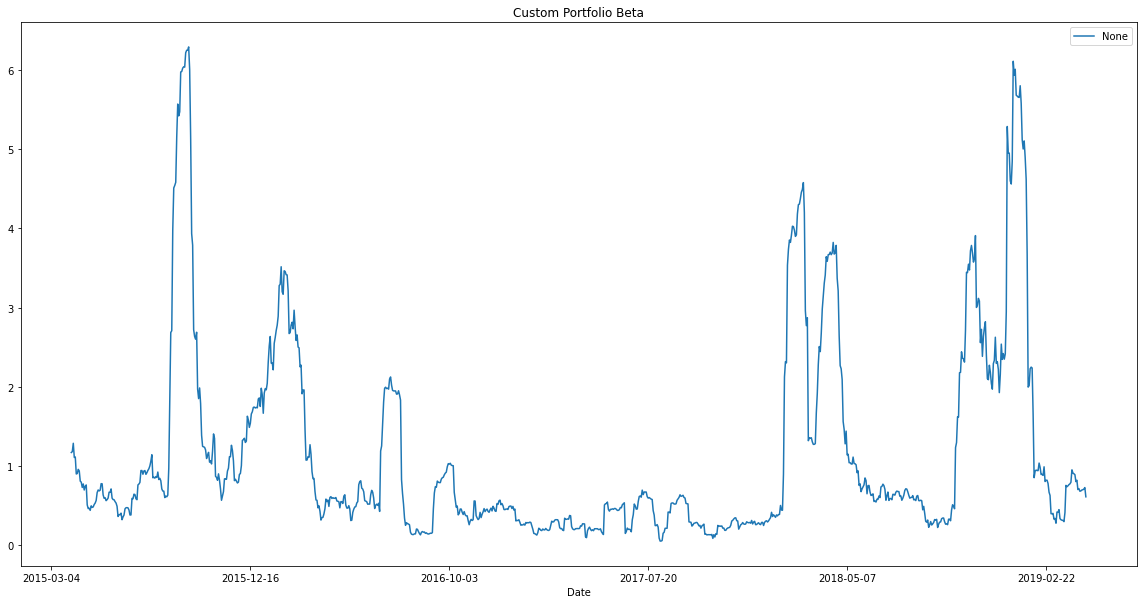

In [87]:
#Beta for Custom
Custom_covariance = all_returns['Custom'].rolling(21).cov(all_returns['S&P 500'])
Custom_variance = all_returns['S&P 500'].var()
Custom_beta = Custom_covariance / Custom_variance

Custom_beta.plot(kind='line',figsize=(20,10),legend=True,title='Custom Portfolio Beta')

In [ ]:
############### Q  and  A ###############

### Performance Analysis ###

#1) Do any portfolio outperform the S&P 500?
    #1a) Yes, the Algo 1 portfolio and Berkshire Hathaway outperformed the S&P500.

### Risk Analysis ###

#2) Which box has the largest spread? Which has the smallest spread?
    #2a)Berkshire Hathaway & Tiger Capital have the largest spreads
    #2b)Paulson has one of the smallest spreads.
    
#3) Which portfolios are riskier than the S&P 500?
    #3a)Berkshire Hathaway & Tiger Capital are riskier than the S&P 500.
    
### Rolling Statistics ###

#4) Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
    #4a)Not ALWAYS, but the corretion is pretty strong.
#5) Which returns most closely mimic the S&P?
    #5a) The Algo 2 portfolio most closely mimics the S&P500.
#6) Does the portfolio seem sensitive to movements in the S&P 500?
    #6a) Every portfolio, except for Algo 1, has a relatively strong correlation to the S&P500.